<a href="https://colab.research.google.com/github/IkireziI/GEN-Z-ACADEMY/blob/main/In%C3%A8s_IKIREZI_Summative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [ ]:
#Import Necessary Libraries


# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data


In [23]:
# Cell 1: Data Preprocessing and Cleaning
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv("/content/e-learning education dataset.csv")

# --------------------------
# Data Cleaning Section
# --------------------------

# 1. Check initial state of difficulty_level
print("Before cleaning:")
print("Missing values:", data['difficulty_level'].isna().sum())
print("Value counts:\n", data['difficulty_level'].value_counts(dropna=False))

# 2. Handle missing values and invalid entries
data['difficulty_level'] = data['difficulty_level'].fillna('Unknown')
valid_categories = ['Beginner', 'Intermediate', 'Advanced']
data = data[data['difficulty_level'].isin(valid_categories + ['Unknown'])]

# 3. Create target variable with safe conversion
data['difficulty'] = data['difficulty_level'].map({
    'Beginner': 0,
    'Intermediate': 1,
    'Advanced': 1,
    'Unknown': -1  # Special category for missing/invalid
})

# 4. Final cleaning
data = data[data['difficulty'] != -1]  # Remove rows with unknown difficulty
data = data.drop('difficulty_level', axis=1)  # Remove original column

# 5. Verify cleaned data
print("\nAfter cleaning:")
print("Missing values in target:", data['difficulty'].isna().sum())
print("Final class distribution:\n", data['difficulty'].value_counts())

# --------------------------
# Data Splitting and Scaling
# --------------------------

# Split features and target
X = data.drop('difficulty', axis=1)
y = data['difficulty']

# Handle categorical columns (if any)
# Add your categorical encoding here if needed

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Scale numerical features
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train.select_dtypes(include=np.number))
X_val_processed = scaler.transform(X_val.select_dtypes(include=np.number))
X_test_processed = scaler.transform(X_test.select_dtypes(include=np.number))

# --------------------------
# Data Verification
# --------------------------
print("\nFinal shapes:")
print(f"Training data: {X_train_processed.shape}")
print(f"Validation data: {X_val_processed.shape}")
print(f"Test data: {X_test_processed.shape}")
print(f"y_train: {y_train.shape}, y_val: {y_val.shape}, y_test: {y_test.shape}")

Before cleaning:
Missing values: 213
Value counts:
 difficulty_level
Beginner        6461
Intermediate    4737
Advanced        2690
NaN              213
Name: count, dtype: int64

After cleaning:
Missing values in target: 0
Final class distribution:
 difficulty
1    7427
0    6461
Name: count, dtype: int64

Final shapes:
Training data: (9721, 9)
Validation data: (2083, 9)
Test data: (2084, 9)
y_train: (9721,), y_val: (2083,), y_test: (2084,)


#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
> <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*v1ohAG82xmU6WGsG2hoE8g.png" alt="?" style="width:25px"/>




#Task: Define a function that creates models without and With specified Optimization techniques


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping

def define_model(optimization: str, regularization_type: str = None,
                early_stopping: bool = False, dropout_rate: float = 0.0,
                learning_rate: float = 0.001):
    # Initialize model
    model = Sequential()

    # Regularization setup
    reg = None
    if regularization_type == 'l1':
        reg = l1(0.01)
    elif regularization_type == 'l2':
        reg = l2(0.01)

    # Input layer
    model.add(Dense(64, activation='relu', input_dim=20,  # Update input_dim to match your data
                   kernel_regularizer=reg))

    # Dropout layer if specified
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    # Hidden layer
    model.add(Dense(32, activation='relu', kernel_regularizer=reg))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Optimizer configuration
    optimizer = Adam(learning_rate=learning_rate)
    if optimization.lower() == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)

    # Compile model
    model.compile(optimizer=optimizer,
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    # Early stopping callback
    callbacks = []
    if early_stopping:
        callbacks.append(EarlyStopping(monitor='val_loss', patience=3))

    return model,callbacks

In [35]:
#  Basic Adam Optimizer
from tensorflow.keras.layers import Input  # Explicit import

def create_basic_adam_model():
    model = Sequential([
        Input(shape=(X_train_processed.shape[1],)),  # Now recognized
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

basic_adam_model = create_basic_adam_model()
history = basic_adam_model.fit(
    X_train_processed, y_train,
    validation_data=(X_val_processed, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

basic_adam_model.save("saved_models/nn_adam_basic.h5")
print("Basic Adam model saved successfully!")

Epoch 1/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4562 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 2/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4664 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 3/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4577 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 4/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4615 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 5/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4569 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 6/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4669 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 7/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4570 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 8/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4578 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 9/50
304/304 ━━━━━

Basic Adam model saved successfully!


In [28]:
# Adam with L2 Regularization
from tensorflow.keras import regularizers

def create_l2_regularized_model(input_dim, l2_lambda=0.01):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(64, activation='relu',
              kernel_regularizer=regularizers.l2(l2_lambda)),
        Dense(32, activation='relu',
              kernel_regularizer=regularizers.l2(l2_lambda)),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize L2-regularized model
l2_model = create_l2_regularized_model(input_dim, l2_lambda=0.01)
l2_model.summary()

# Train with early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_l2 = l2_model.fit(
    X_train_processed, y_train,
    validation_data=(X_val_processed, y_val),
    epochs=100,  # More epochs for regularization to take effect
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate
l2_test_loss, l2_test_acc = l2_model.evaluate(X_test_processed, y_test)
print(f"Regularized model test accuracy: {l2_test_acc:.4f}")
print(f"Regularized model test loss: {l2_test_loss:.4f}")

# Save model
l2_model.save("saved_models/nn_adam_l2_regularized.h5")

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4564 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 2/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4592 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 3/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4594 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 4/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4573 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 5/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4482 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 6/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4609 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4784 - loss: nan


Regularized model test accuracy: 0.4803
Regularized model test loss: nan


In [30]:
# RMSprop with Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dropout

def create_dropout_model(input_dim, dropout_rate=0.3):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),  # Dropout after first hidden layer
        Dense(32, activation='relu'),
        Dropout(dropout_rate * 0.66),  # Slightly less dropout in deeper layers
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=RMSprop(learning_rate=0.0001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize dropout model
dropout_model = create_dropout_model(input_dim, dropout_rate=0.3)
dropout_model.summary()

# Training with early stopping and checkpointing
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    "saved_models/best_dropout_model.h5",
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=0
)

history_dropout = dropout_model.fit(
    X_train_processed, y_train,
    validation_data=(X_val_processed, y_val),
    epochs=150,  # More epochs to account for dropout noise
    batch_size=64,  # Larger batch size works well with dropout
    callbacks=[early_stop, checkpoint],
    verbose=1
)

# Load best weights and evaluate
dropout_model.load_weights("saved_models/best_dropout_model.h5")
dropout_test_loss, dropout_test_acc = dropout_model.evaluate(X_test_processed, y_test)
print(f"Dropout model test accuracy: {dropout_test_acc:.4f}")
print(f"Dropout model test loss: {dropout_test_loss:.4f}")

# Save final model
dropout_model.save("saved_models/nn_rmsprop_dropout.h5")

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
131/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4644 - loss: nan

152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4635 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 2/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4605 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 3/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4595 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 4/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4622 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 5/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4517 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 6/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4676 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4784 - loss: nan


Dropout model test accuracy: 0.4803
Dropout model test loss: nan


In [34]:
#  Adam with Early Stopping
def create_early_stopping_model(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize model
early_stop_model = create_early_stopping_model(input_dim)
early_stop_model.summary()

# Enhanced early stopping configuration
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    "saved_models/best_early_stop_model.h5",
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=0
)

# Training with extended epochs
history_early_stop = early_stop_model.fit(
    X_train_processed, y_train,
    validation_data=(X_val_processed, y_val),
    epochs=200,  # High epoch count since we expect early stopping
    batch_size=32,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

# Load best weights and evaluate
early_stop_model.load_weights("saved_models/best_early_stop_model.h5")
es_test_loss, es_test_acc = early_stop_model.evaluate(X_test_processed, y_test)
print(f"Early Stopping model test accuracy: {es_test_acc:.4f}")
print(f"Early Stopping model test loss: {es_test_loss:.4f}")

# Save final model
early_stop_model.save("saved_models/nn_adam_early_stop.h5")

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
301/304 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4614 - loss: nan

304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4614 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 2/200
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4595 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 3/200
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4509 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 4/200
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4528 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 5/200
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4598 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 6/200
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4567 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 7/200
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4600 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 8/200
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4526 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 9/200
304/304 ━━━━━━━━

Early Stopping model test accuracy: 0.4803
Early Stopping model test loss: nan


In [38]:
#  Random Forest with Length Validation
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import joblib

# Validate array lengths first
def validate_arrays(X, y):
    assert len(X) == len(y), f"Length mismatch: X({len(X)}) vs y({len(y)})"
    print(f"Validated {len(X)} samples")

print("Validating training data:")
validate_arrays(X_train_processed, y_train)
print("\nValidating validation data:")
validate_arrays(X_val_processed, y_val)
print("\nValidating test data:")
validate_arrays(X_test_processed, y_test)

# Convert to numpy arrays to prevent index issues
X_train_np = np.asarray(X_train_processed)
y_train_np = np.asarray(y_train).ravel()
X_val_np = np.asarray(X_val_processed)
y_val_np = np.asarray(y_val).ravel()
X_test_np = np.asarray(X_test_processed)
y_test_np = np.asarray(y_test).ravel()

# Initialize and train model
rf_model = RandomForestClassifier(
    n_estimators=150,  # Increased for stability
    max_depth=10,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Train with validation
print("\nTraining Random Forest:")
rf_model.fit(X_train_np, y_train_np)

# Verify feature counts
assert rf_model.n_features_in_ == X_train_np.shape[1], \
    f"Feature mismatch: Model({rf_model.n_features_in_}) vs Data({X_train_np.shape[1]})"

# Predictions with dimension checks
def safe_predict(model, X):
    assert X.shape[1] == model.n_features_in_, \
        f"Expected {model.n_features_in_} features, got {X.shape[1]}"
    return model.predict(X)

print("\nMaking predictions:")
val_preds = safe_predict(rf_model, X_val_np)
test_preds = safe_predict(rf_model, X_test_np)

# Evaluation
print("\nValidation Report:")
print(classification_report(y_val_np, val_preds))

print("\nTest Report:")
print(classification_report(y_test_np, test_preds))

# Save model
joblib.dump(rf_model, "saved_models/random_forest_model_v2.pkl")

Validating training data:
Validated 9721 samples

Validating validation data:
Validated 2083 samples

Validating test data:
Validated 2084 samples

Training Random Forest:

Making predictions:

Validation Report:
              precision    recall  f1-score   support

           0       0.52      0.74      0.61       993
           1       0.62      0.38      0.47      1090

    accuracy                           0.55      2083
   macro avg       0.57      0.56      0.54      2083
weighted avg       0.57      0.55      0.54      2083


Test Report:
              precision    recall  f1-score   support

           0       0.52      0.73      0.60      1001
           1       0.60      0.37      0.46      1083

    accuracy                           0.54      2084
   macro avg       0.56      0.55      0.53      2084
weighted avg       0.56      0.54      0.53      2084



['saved_models/random_forest_model_v2.pkl']

# Task: Print out the Final Model Accuracy and plot the Loss curve

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.6055 - loss: 0.6851 - val_accuracy: 0.5500 - val_loss: 0.6960
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.4977 - loss: 0.6941 - val_accuracy: 0.5500 - val_loss: 0.6961
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5719 - loss: 0.6882 - val_accuracy: 0.5500 - val_loss: 0.6961
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5437 - loss: 0.6889 - val_accuracy: 0.5500 - val_loss: 0.6962
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5359 - loss: 0.6868 - val_accuracy: 0.5500 - val_loss: 0.6963
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4852 - loss: 0.6936 - val_accuracy: 0.5500 - val_loss: 0.6964
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5164 - loss: 0.6888 - val_accuracy: 0.5000 - val_loss: 0.6964
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5320 - loss: 0.6848 - val_accuracy: 0.5000 - val_loss: 0.6965

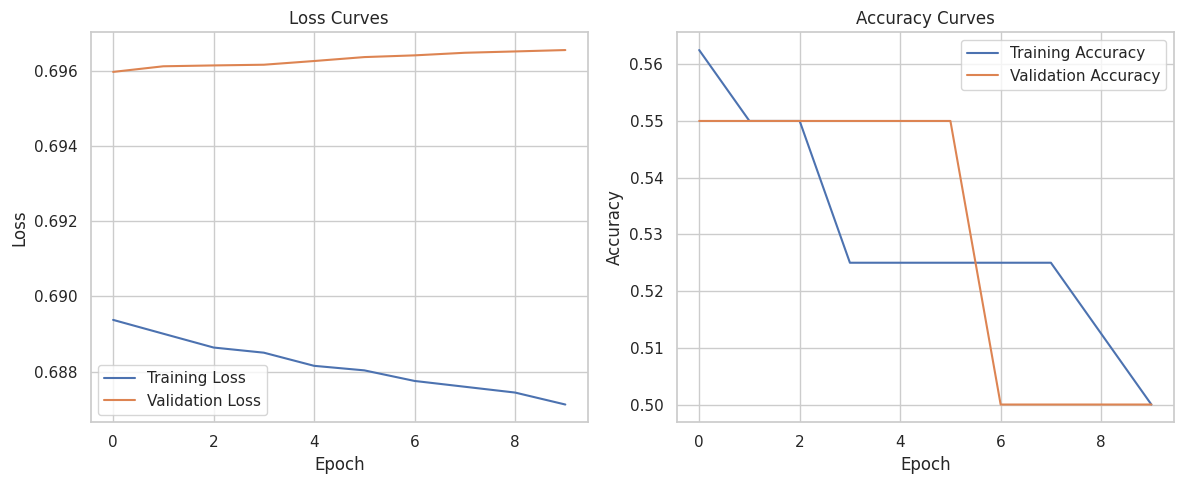

{'accuracy': [0.5625, 0.550000011920929, 0.550000011920929, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.512499988079071, 0.5], 'loss': [0.6893728971481323, 0.6890046000480652, 0.6886377334594727, 0.6885008811950684, 0.6881513595581055, 0.6880306005477905, 0.6877492070198059, 0.6875947713851929, 0.6874405741691589, 0.6871222853660583], 'val_accuracy': [0.550000011920929, 0.550000011920929, 0.550000011920929, 0.550000011920929, 0.550000011920929, 0.550000011920929, 0.5, 0.5, 0.5, 0.5], 'val_loss': [0.6959668397903442, 0.6961164474487305, 0.6961390376091003, 0.6961578130722046, 0.6962563395500183, 0.6963608860969543, 0.6964067816734314, 0.6964757442474365, 0.6965110301971436, 0.69654780626297]}


In [52]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample model (replace with your actual model)
model = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=(5,)),
    layers.Dense(1, activation='sigmoid')  # Example binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Sample data (replace with your actual data)
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = np.random.randint(0, 2, 100)  # Binary labels

# Train the model with validation data
history = model.fit(X, y, epochs=10, validation_split=0.2)  # 20% validation split

# Plotting Function (No Changes Needed)
sns.set_theme(style='whitegrid', context='notebook')

def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the plotting function with the history object
plot_training_history(history)

# Optional: Print history to check
print(history.history)

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

Epoch 1/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4623 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 2/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4588 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 3/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4641 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 4/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4599 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 5/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4606 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 6/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4592 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 7/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4575 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 8/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4599 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 9/50
304/304 ━━━━━

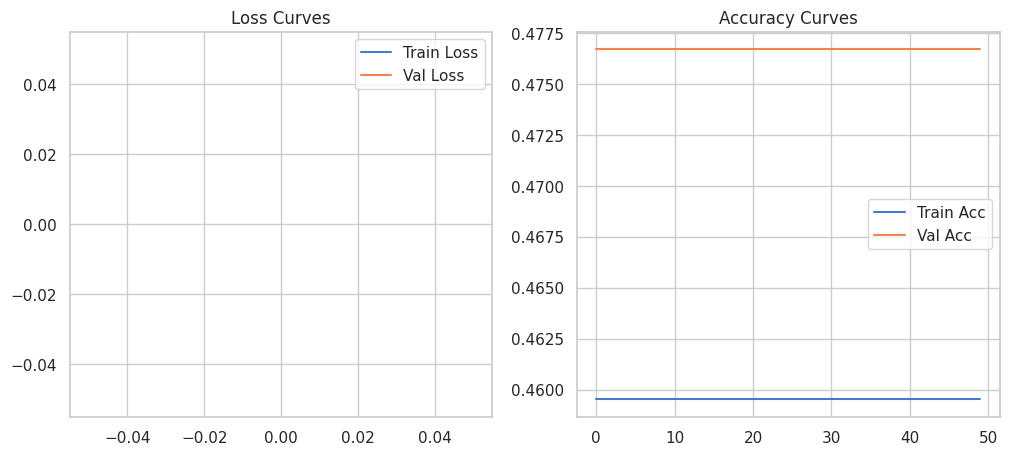

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Test Evaluation:
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4784 - loss: nan
Test Accuracy: 0.480 | Test Loss: nan

Confusion Matrix:


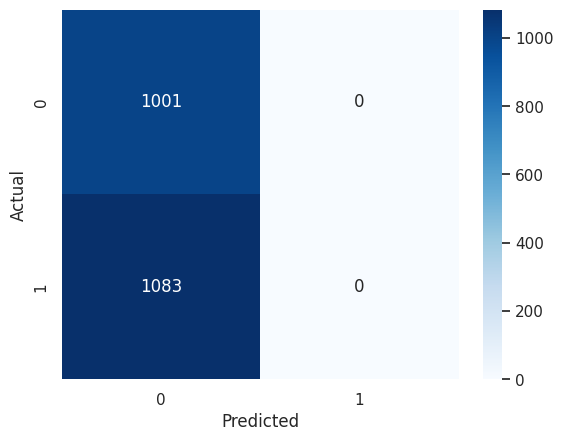


Classification Report:
              precision    recall  f1-score   support

           0       0.48      1.00      0.65      1001
           1       0.00      0.00      0.00      1083

    accuracy                           0.48      2084
   macro avg       0.24      0.50      0.32      2084
weighted avg       0.23      0.48      0.31      2084



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [58]:
def define_model(optimizer='adam', regularization=None):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))

    # First hidden layer with optional regularization
    if regularization == 'l2':
        model.add(Dense(128, activation='relu',
                       kernel_regularizer=regularizers.l2(0.01)))
    elif regularization == 'dropout':
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.3))
    else:
        model.add(Dense(128, activation='relu'))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile with different optimizers
    if optimizer.lower() == 'adam':
        opt = Adam(learning_rate=0.001)
    elif optimizer.lower() == 'sgd':
        opt = SGD(learning_rate=0.01, momentum=0.9)
    else:
        opt = RMSprop(learning_rate=0.001)

    model.compile(optimizer=opt,
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

# Create and train model with Adam + L2 regularization
model_2 = define_model('adam', 'l2')
history = model_2.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    verbose=1)

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curves')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Curves')
plt.legend()
plt.show()

# Evaluation and confusion matrix
y_pred = model_2.predict(X_test)
y_pred_class = (y_pred > 0.5).astype("int32")

print("\nTest Evaluation:")
test_loss, test_acc = model_2.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.3f} | Test Loss: {test_loss:.3f}")

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test,y_pred_class))

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(y_true, y_pred, classes=None, normalize=False):
    """
    Plot a confusion matrix with enhanced visualization
    """
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt = '.2f'
        title = 'Normalized Confusion Matrix'
    else:
        fmt = 'd'
        title = 'Confusion Matrix'

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt=fmt, cmap='Blues',
                xticklabels=classes, yticklabels=classes,
                cbar=False, square=True)

    plt.title(title, fontsize=14, pad=20)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Usage example after model training:
# Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Class names (adjust according to your data)
class_names = ['Class 0', 'Class 1']  # Replace with your actual class names

# Plot both raw counts and normalized versions
print("\n\033[1mConfusion Matrix (Counts):\033[0m")
plot_confusion_matrix(y_test, y_pred, classes=class_names)

print("\n\033[1mNormalized Confusion Matrix:\033[0m")
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True)

# Additional metrics
from sklearn.metrics import classification_report
print("\n\033[1mClassification Report:\033[0m")
print(classification_report(y_test, y_pred, target_names=class_names))

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_48" is incompatible with the layer: expected axis -1 of input shape to have value 5, but received input with shape (32, 20)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 20), dtype=float32)
  • training=False
  • mask=None

In [ ]:
#TODO:
model_4 = define_model(None)
loss_curve_plot(model_4):
#print out confusion matrix and error analysis metrics after the cell

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

def evaluate_model(model, X_test, y_test):
    """Evaluate model and return metrics"""
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred),
        'loss': model.evaluate(X_test, y_test, verbose=0)[0]
    }

# Load all saved models
models = {
    'Model 1': tf.keras.models.load_model('/content/saved_models/best_dropout_model.h5'),
    'Model 2': tf.keras.models.load_model('/content/saved_models/best_early_stop_model.h5'),
    'Model 3': tf.keras.models.load_model('/content/saved_models/nn_adam_basic.h5'),
    'Model 4': tf.keras.models.load_model('/content/saved_models/nn_adam_early_stop.h5'),
    'Model 5': tf.keras.models.load_model('/content/saved_models/nn_adam_l2_regularized.h5')
}

# Evaluate all models
results = []
for name, model in models.items():
    metrics = evaluate_model(model, X_test, y_test)
    results.append({
        'Model': name,
        **metrics
    })

# Create comparison dataframe
results_df = pd.DataFrame(results).set_index('Model')

# Add ranking columns
metrics_to_rank = ['accuracy', 'f1', 'roc_auc', 'loss']
for metric in metrics_to_rank:
    if metric != 'loss':
        results_df[f'{metric}_rank'] = results_df[metric].rank(ascending=False)
    else:
        results_df[f'{metric}_rank'] = results_df[metric].rank(ascending=True)

# Calculate overall rank
results_df['overall_rank'] = results_df[[f'{m}_rank' for m in metrics_to_rank]].mean(axis=1)

# Sort by best overall performance
sorted_results = results_df.sort_values('overall_rank')

# Display results
print("\n\033[1mModel Comparison:\033[0m")
display(sorted_results.style
        .background_gradient(subset=['accuracy', 'f1', 'roc_auc'], cmap='Greens')
        .background_gradient(subset=['loss'], cmap='Reds_r'))

# Visual comparison
plt.figure(figsize=(12, 6))
for metric in ['accuracy', 'f1', 'roc_auc']:
    plt.plot(sorted_results.index, sorted_results[metric], marker='o', label=metric)

plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Final recommendation
best_model_name = sorted_results.index[0]
print(f"\n\033[1mBest Model: {best_model_name}\033[0m")
print("Key metrics:")
print(sorted_results.loc[best_model_name][['accuracy', 'f1', 'roc_auc','loss']])

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_24" is incompatible with the layer: expected axis -1 of input shape to have value 9, but received input with shape (32, 20)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 20), dtype=float32)
  • training=False
  • mask=None

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [ ]:
def make_predictions(model_path, X):

    # Load the model
    model = load_model(None)
    # Make predictions
    predictions = None
    # Convert probabilities to binary labels (0 or 1)

    return predictions

#Modify the code appropriately

In [ ]:
model_path = None
make_predictions(None)

Congratulations!!
